In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



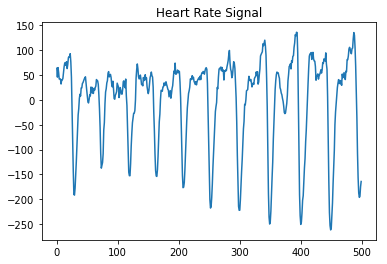

In [2]:
path = r"C:\Users\Adway\Desktop\Mini Project\Data File\MAX data"
dataset1 = pd.read_csv(r"C:\Users\Adway\Desktop\Mini Project\Data File\PPGclean\S0001\002.csv",) 
plt.title("PPG Signal") 
dataset1 = dataset1.rename(columns = {'S2': 'PLETH'})
#drop_locs = dataset1.loc[dataset1['PLETH'] == 2147483647].index
#dataset1 = dataset1.drop(drop_locs)
data = dataset1.PLETH
plt.plot(data) 
plt.show() 

In [3]:
from scipy.interpolate import UnivariateSpline
from scipy.signal import butter, filtfilt, welch, periodogram, resample_poly, resample, firwin

def highpass(data,f):
    '''Defines standard Butterworth lowpass filter.
    '''
    numtaps = 77
    filterc = firwin(numtaps, f)
    filtered =  np.array([np_convolve(xi, filterc , mode='valid') for xi in x])
    return filtered

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
measures = {}
def get_data(filename):
    dataset = pd.read_csv(filename)
    return dataset

In [5]:
def movingavg(dataset, hrw, fs):
    mov_avg = dataset['PLETH'].rolling(int(hrw*fs)).mean()
    avg_hr = (np.mean(dataset.PLETH))
    mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
    #mov_avg = [x*1.15 for x in mov_avg]
    dataset['new_rollingmean'] = mov_avg

In [6]:
def detect_peaks(dataset):
    w = []
    peaklist = []
    listpos = 0
    for datapoint in dataset.PLETH:
        rollingmean = dataset.new_rollingmean[listpos]
        if (datapoint <= rollingmean) and (len(w) <= 1):
            listpos += 1
        elif (datapoint > rollingmean):
            w.append(datapoint)
            listpos += 1
        else:
            maximum = max(w)
            beatposition = listpos - len(w) + (w.index(max(w)))
            peaklist.append(beatposition)
            w = []
            listpos += 1
    measures['peaklist'] = peaklist
    measures['ybeat'] = [dataset.PLETH[x] for x in peaklist]

In [7]:
def calc_RR(dataset, fs):
    RR_list = []
    peaklist = measures['peaklist']
    cnt = 0
    while (cnt < (len(peaklist)-1)):
        RR_interval = (peaklist[cnt+1] - peaklist[cnt])
        ms_dist = ((RR_interval / fs) * 1000.0)
        RR_list.append(ms_dist)
        cnt += 1
    measures['RR_list'] = RR_list
    
    RR_dif = []
    RR_sqdif = []
    cnt = 0
    while (cnt < (len(RR_list)-1)):
        RR_dif.append(abs(RR_list[cnt] - RR_list[cnt+1]))
        RR_sqdif.append(math.pow(RR_dif[cnt] - RR_list[cnt+1], 2))
        cnt += 1
    measures['RR_list'] = RR_list
    measures['Rdif'] = RR_dif
    measures['Rsqdif'] = RR_sqdif

In [8]:
def calc_bpm():
    RR_list = measures['RR_list']
    measures['bpm'] = 60000 / np.mean(RR_list)

In [9]:
def plotter(dataset, title):
    peaklist = measures['peaklist']
    ybeat = measures['ybeat']
    plt.title(title)
    plt.plot(dataset.PLETH, alpha=0.5, color='blue', label="raw signal")
    plt.plot(dataset.new_rollingmean, color ='green', label="moving average")
    plt.scatter(peaklist, ybeat, color='red', label="average: %.1f BPM" %measures['bpm'])
    plt.legend(loc=4, framealpha=0.6)
    plt.show()

In [10]:
def time_measures():
    RR_list = measures['RR_list']
    RR_diff = measures['Rdif']
    RR_sqdiff = measures['Rsqdif']
    measures['bpm'] = 60000 / np.mean(RR_list)
    measures['ibi'] = np.mean(RR_list)
    measures['sdnn'] = np.std(RR_list)
    measures['sdsd'] = np.std(RR_diff)
    measures['rmssd'] = np.sqrt(np.mean(RR_sqdiff))
    NN20 = [x for x in RR_diff if (x>20)]
    NN50 = [x for x in RR_diff if (x>50)]
    measures['nn20'] = NN20
    measures['nn50'] = NN50
    measures['pnn20'] = float(len(NN20)) / float(len(RR_diff))
    measures['pnn50'] = float(len(NN50)) / float(len(RR_diff))

In [11]:
def process(dataset, hrw, fs): 
    movingavg(dataset, hrw, fs)
    detect_peaks(dataset)
    calc_RR(dataset, fs)
    calc_bpm()
    time_measures()
    plotter(dataset, "Your PPG Plot  with peaks")


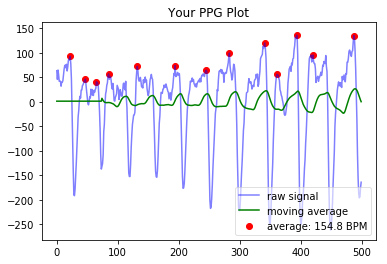

{'peaklist': [22, 47, 65, 85, 132, 194, 245, 283, 341, 361, 393, 420, 487],
 'ybeat': [92.97217031,
  46.50317972,
  40.96607991,
  56.901719299999996,
  72.3270105,
  74.06238927,
  64.8592973,
  99.49974597,
  120.17037250000001,
  56.02771454,
  136.0888017,
  95.62488972,
  135.4405617],
 'RR_list': [250.0,
  180.0,
  200.0,
  470.0,
  620.0,
  510.0,
  380.0,
  580.0,
  200.0,
  320.0,
  270.0,
  670.0],
 'Rdif': [70.0,
  20.0,
  270.0,
  150.0,
  110.0,
  130.0,
  200.0,
  380.0,
  120.0,
  50.0,
  400.0],
 'Rsqdif': [12100.0,
  32400.0,
  40000.0,
  220900.0,
  160000.0,
  62500.0,
  144400.0,
  32400.0,
  40000.0,
  48400.0,
  72900.0],
 'bpm': 154.83870967741936,
 'ibi': 387.5,
 'sdnn': 169.1707717071717,
 'sdsd': 121.66204376288434,
 'rmssd': 280.5838069584072,
 'nn20': [70.0, 270.0, 150.0, 110.0, 130.0, 200.0, 380.0, 120.0, 50.0, 400.0],
 'nn50': [70.0, 270.0, 150.0, 110.0, 130.0, 200.0, 380.0, 120.0, 400.0],
 'pnn20': 0.9090909090909091,
 'pnn50': 0.8181818181818182}

In [12]:
process(dataset1,0.75,100)
measures

In [13]:
from scipy.interpolate import interp1d #Import the interpolate function from SciPy
peaklist = measures['peaklist'] 
RR_list = measures['RR_list']
RR_x = peaklist[1:] 
RR_y = RR_list 
RR_x_new = np.linspace(RR_x[0],RR_x[-1],RR_x[-1]) #Create evenly spaced timeline starting at the second peak, its endpoint and length equal to position of last peak
f = interp1d(RR_x, RR_y, kind='cubic') #Interpolate the signal with cubic spline interpolation

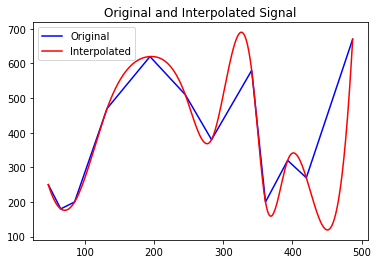

In [14]:
plt.title("Original and Interpolated Signal")
plt.plot(RR_x, RR_y, label="Original", color='blue')
plt.plot(RR_x_new, f(RR_x_new), label="Interpolated", color='red')
plt.legend()
plt.show()

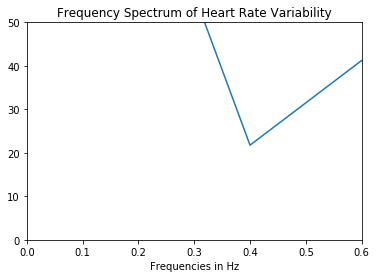

In [15]:
#Set variables
fs = 100
n = len(dataset1.PLETH) #Length of the signal
frq = np.fft.fftfreq(len(dataset1.PLETH), d=((1/fs))) #divide the bins into frequency categories
frq = frq[range(n//2)] 
#Do FFT
Y = np.fft.fft(f(RR_x_new))/n #Calculate FFT
Y = Y[range(n//2)] #Return one side of the FFT
#Plot
plt.title("Frequency Spectrum of HRV parameter")
plt.xlim(0,0.6) #Limit X axis to frequencies of interest (0-0.6Hz for visibility, we are interested in 0.04-0.5)
plt.ylim(0, 50) #Limit Y axis for visibility
plt.plot(frq, abs(Y)) #Plot it
plt.xlabel("Frequencies in Hz")
plt.show()

In [16]:
lf = np.trapz(abs(Y[(frq>=0.04) & (frq<=0.15)])) #Slice frequency spectrum where x is between 0.04 and 0.15Hz (LF), and use NumPy's trapezoidal integration function to find the area
print("LF:", lf)
hf = np.trapz(abs(Y[(frq>=0.16) & (frq<=0.5)])) #Do the same for 0.16-0.5Hz (HF)
print("HF:", hf)

LF: 0.0
HF: 56.426686678907544
